In [1]:
import numpy as np
import pandas as pd
#Visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling as pp

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\amt\AppData\Local\Temp\ipykernel_13588\726865404.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df = pd.read_csv('Heart Disease.csv')

Data Information

The data sample is very informative.Annual CDC survey data of 400k adults related to their health status:
The original dataset of nearly 300 variables was reduced to just about
18 variables. In addition to classical EDA, this dataset can be used to
apply a range of machine learning methods.The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals).
In machine learning projects, "HeartDisease" can be used as the
explonatory variable, but note that the classes are heavily unbalanced.

What features characterize our data sample?

HeartDisease - target trait.
BMI - a value that allows you to assess the degree of correspondence between a person's mass and his height, and thereby indirectly judge whether the mass is insufficient, normal or excessive. It is important in determining the indications for the need for treatment.
Smoking is a major risk factor for cardiovascular disease. When smoke from a cigarette is inhaled, the reaction of the cardiovascular system immediately follows: within one minute, the heart rate begins to rise, increasing by 30% within ten minutes of smoking. The bad habit also increases blood pressure, fibrinogen and platelet levels, making blood clots more likely.
AlcoholDrinking - alcohol causes not only temporary disturbances in the functioning of the heart, but also permanent ones. Heart pain after alcohol is not the only health problem associated with alcohol consumption.
Stroke - Ischemic stroke occurs 4 times more often than hemorrhagic. One of the leading causes of this suffering is heart disease, which impairs its functioning, as a result of which the blood flow in the arteries is disturbed and the blood supply to the brain is reduced. Another cause of stroke in heart disease is thromboembolism, when clots form in the cavities of the heart (most often with heart failure) - blood clots.
PhysicalHealth - how many days in a month did you feel poor physical health.
MentalHealth - how many days in a month did you feel poor mental health.
DiffWalking - difficulty climbing stairs.
Sex - gender of a person.
AgeCategory - age category of the subjects. *Race-obviously:)
Diabetic - obviously :)
PhysicalActivity - adults who reported doing physical activity or exercise during the past 30 days other than their regular job
GenHealth - well-being.
SleepTime - number of hours of sleep.
Asthma- obviously :)
KidneyDisease - obviously :)
Skin Cancer - obviously :)

In [3]:
#df.head()----[show the first few rows of DataFrame object]
#df.tail()----[show the last few rows of  DataFrame object]
#df.shape ----[show data shape]
#df.info() ----[show data information]
#df.columns ----[show all columns]
#df.isna().sum()-----[ check for null values]
#df.isna().values.any()----[ all rows control for null values]

# Explore Data

In [4]:
#findout the catagorical and numerical features of DataFrame
col = list(df.columns)
categorical_features = []
numerical_features = []

# Separating categorical and numerical features
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features:', *categorical_features)

print('Numerical Features:', *numerical_features)

Categorical Features: HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Race Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer
Numerical Features: BMI PhysicalHealth MentalHealth AgeCategory SleepTime


# Duplicated values

In [5]:
df.duplicated().sum() #check duplicate values of this DataFrame

18078

In [6]:
#drop duplicate values of this DataFrame
df.drop_duplicates(inplace=True)
df.shape #check data shape after removing duplicate velues

(301717, 18)

# Statistical and general information of the dataset

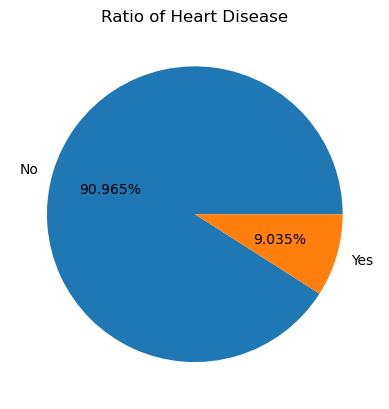

In [7]:
# Calculate the count of each category
heart_disease_counts = df['HeartDisease'].value_counts()

# Plot the pie chart
plt.pie(x=heart_disease_counts, autopct='%1.3f%%', labels=heart_disease_counts.index)

# Set the title of the chart
plt.title('Ratio of Heart Disease')

# Display the chart
plt.show()


We are dealing with an unbalanced sample, where the majority of people are healthy.

Let's look at unique values in categorical objects

In [8]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [9]:
# Create a profile report of the dataframe
report = pp.ProfileReport(df)

# Display the report
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Numeric variables are BMI, PhysicalHealth, MentalHealth, SleepTime. The rest are categorical.

In [10]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Let's analyze numerical variables.

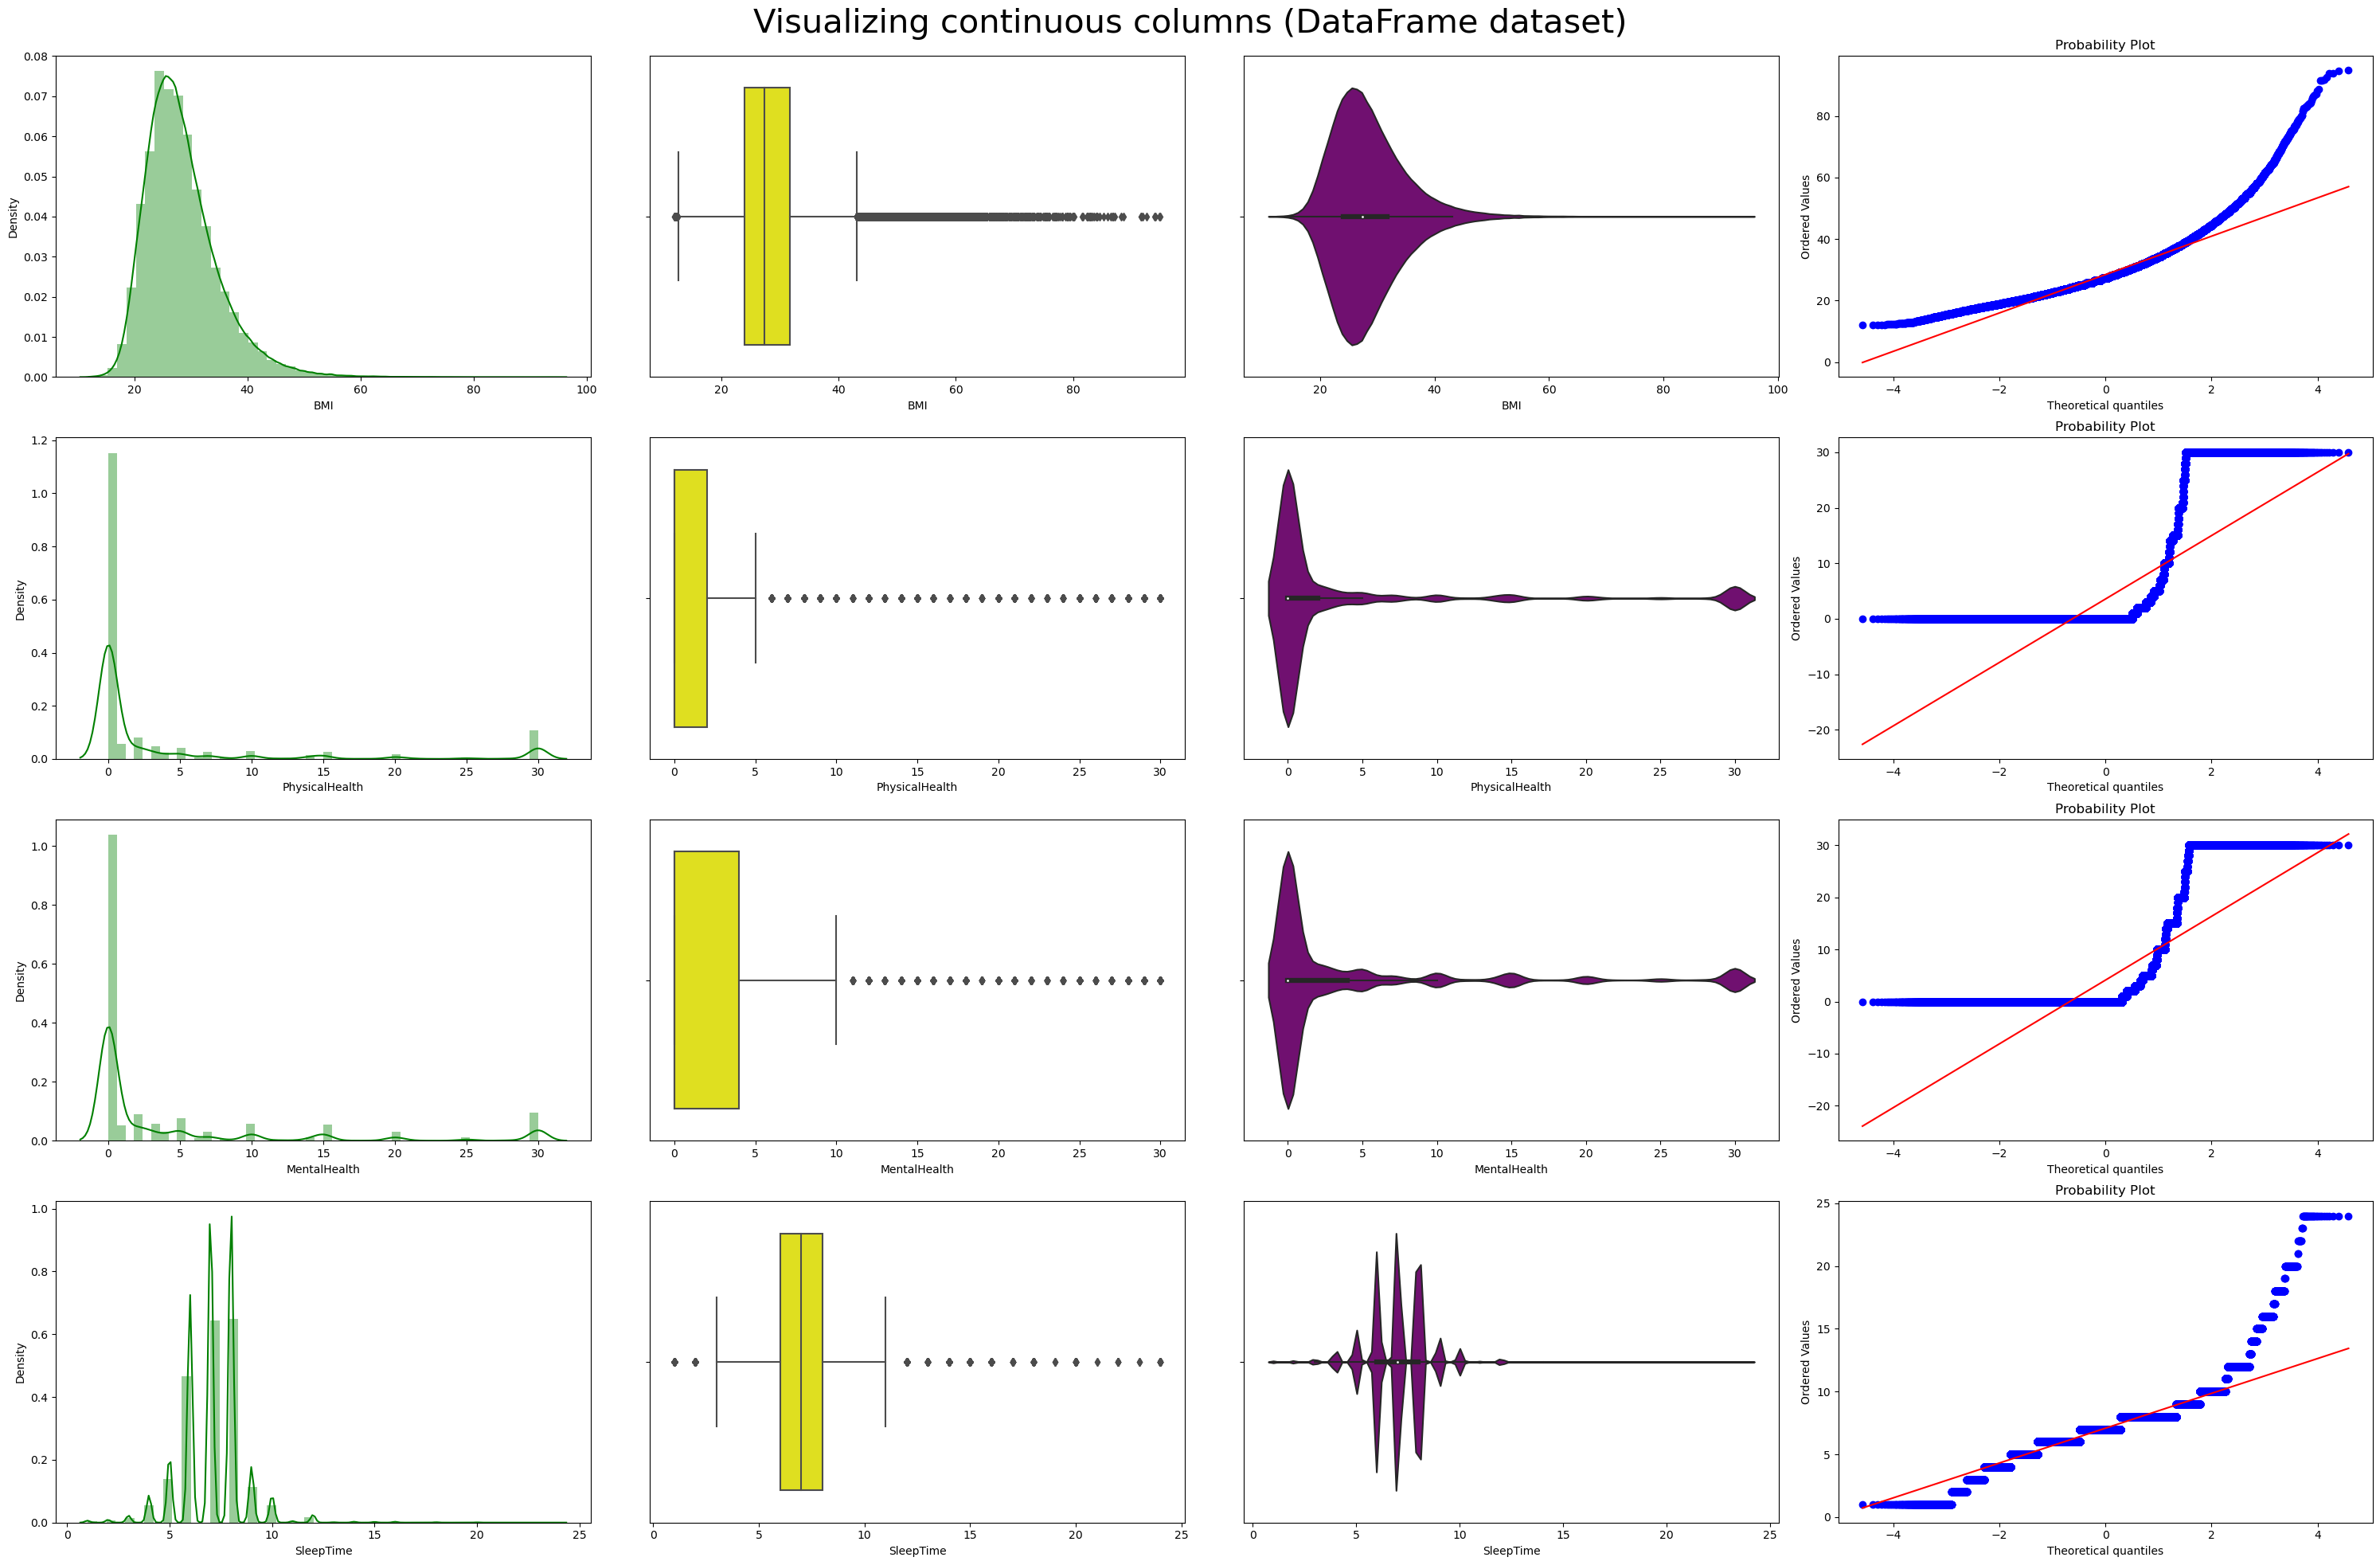

In [11]:
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (DataFrame dataset)",fontsize=30)
plt.show()

In [12]:
# Count the occurrences of 'HeartDisease' based on 'Sex' and 'HeartDisease' columns
heart_disease_counts = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count()

# Display the counts
print(heart_disease_counts)


Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64


In [13]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [14]:
# Count the occurrences of HeartDisease based on AgeCategory and HeartDisease columns
heart_disease_counts = df.groupby(['AgeCategory', 'HeartDisease'])['HeartDisease'].count()

# Display the counts
print(heart_disease_counts)


AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64


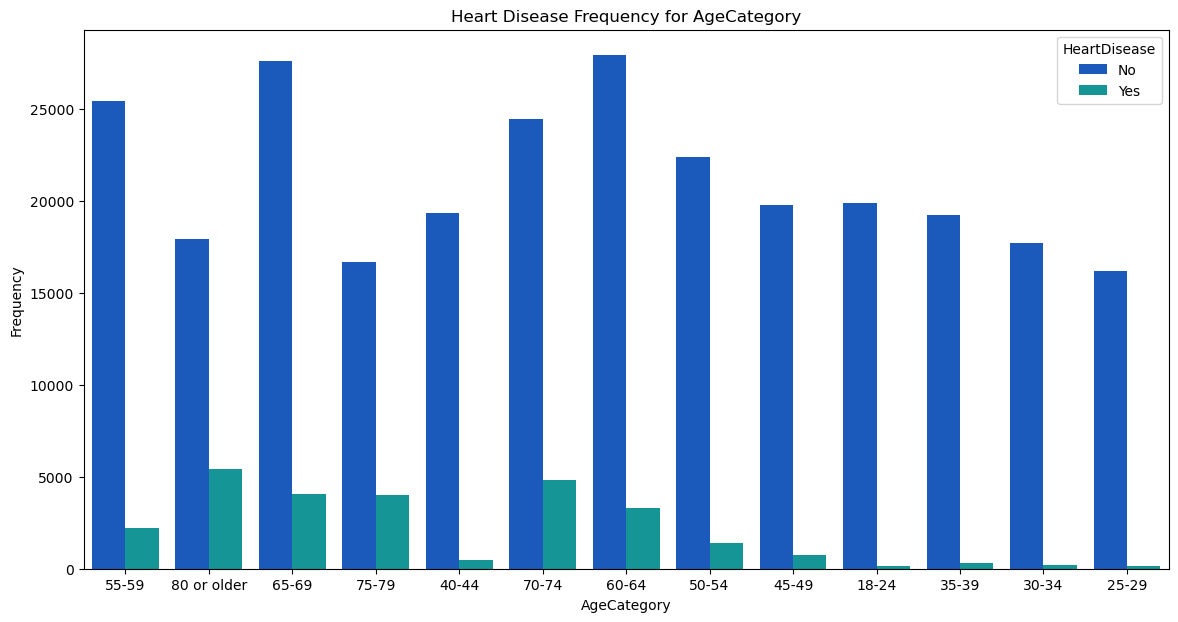

In [15]:
# Show Heart Disease Frequency for AgeCategory 
# Set the figure size
plt.figure(figsize=(14, 7))

# Create the countplot
fig = sns.countplot(x='AgeCategory', data=df, hue='HeartDisease', palette='winter')


# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for AgeCategory')
fig.set_xlabel('AgeCategory')
fig.set_ylabel('Frequency')

# Display the plot
plt.show()

In [16]:
# This code counts the number of people smoking in the DataFrame 'df'
df['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [17]:
# Group the DataFrame by 'Sex', 'AgeCategory', 'Smoking', and 'HeartDisease',
# and count the occurrences of 'HeartDisease'
df.groupby(['Sex', 'AgeCategory', 'Smoking', 'HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

In [18]:
# This code counts the number of people who drink alcohol and those who don't.
df['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [19]:
# Grouping the DataFrame by 'AlcoholDrinking' and 'HeartDisease' columns and counting the occurrences of 'HeartDisease'
df.groupby(['AlcoholDrinking', 'HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [20]:
# Count the occurrences of 'HeartDisease' based on different attributes
df.groupby(['Sex', 'AgeCategory', 'AlcoholDrinking', 'PhysicalActivity', 'HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

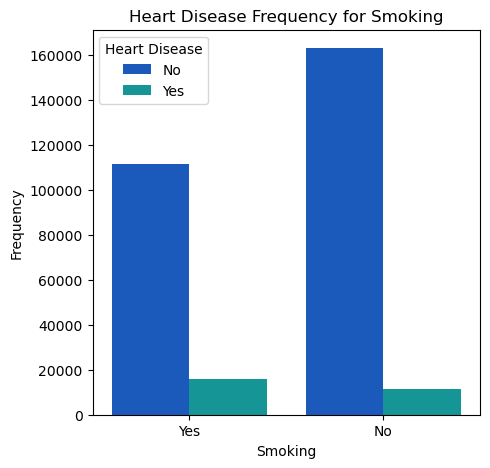

In [21]:
# Show Heart Disease Frequency for Smoking people 
# Set the figure size
plt.figure(figsize=(5, 5))

# Create the countplot
fig = sns.countplot(x='Smoking', data=df, hue='HeartDisease', palette='winter')

# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for Smoking')
fig.set_xlabel('Smoking')
fig.set_ylabel('Frequency')

# Add legend for Heart Disease categories
fig.legend(title='Heart Disease')

# Display the plot
plt.show()


In [22]:
# I want to Know how many people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [23]:
# Group the dataframe by 'AlcoholDrinking' and 'HeartDisease' columns,
# then count the occurrences of 'HeartDisease' within each group
df.groupby(['AlcoholDrinking', 'HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

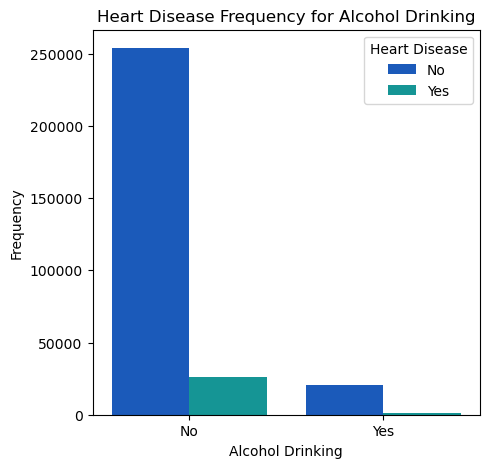

In [24]:
# Show Heart Disease Frequency for Alcohol Drinking people
# Set the figure size
plt.figure(figsize=(5, 5))

# Create the countplot
fig = sns.countplot(x='AlcoholDrinking', data=df, hue='HeartDisease', palette='winter')

# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for Alcohol Drinking')
fig.set_xlabel('Alcohol Drinking')
fig.set_ylabel('Frequency')

# Add legend for Heart Disease categories
fig.legend(title='Heart Disease')

# Display the plot
plt.show()


In [25]:
# Count the occurrences of KidneyDisease in the DataFrame
df['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [26]:
# Show the count of people who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease', 'HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

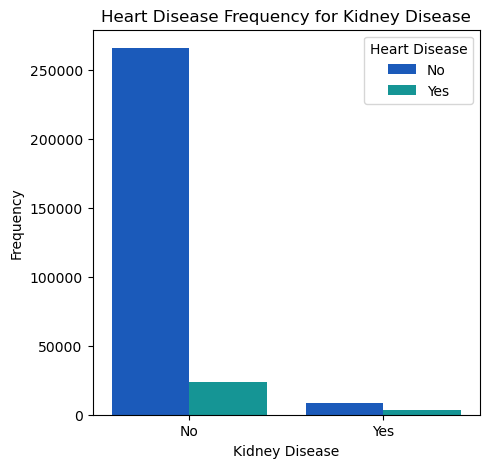

In [27]:
# Show Heart Disease Frequency for Kidney Disease people
# Set the figure size
plt.figure(figsize=(5, 5))

# Create the countplot
fig = sns.countplot(x='KidneyDisease', data=df, hue='HeartDisease', palette='winter')

# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for Kidney Disease')
fig.set_xlabel('Kidney Disease')
fig.set_ylabel('Frequency')

# Add legend for Heart Disease categories
fig.legend(title='Heart Disease')

# Display the plot
plt.show()


In [28]:
# Group the DataFrame by 'Sex' and 'KidneyDisease' columns and count the occurrences of 'KidneyDisease'
df.groupby(['Sex', 'KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [29]:
# Count the occurrences of SkinCancer in the DataFrame
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [30]:
# Show the count of people who have SkinCancer based on Sex
df.groupby(['Sex', 'SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

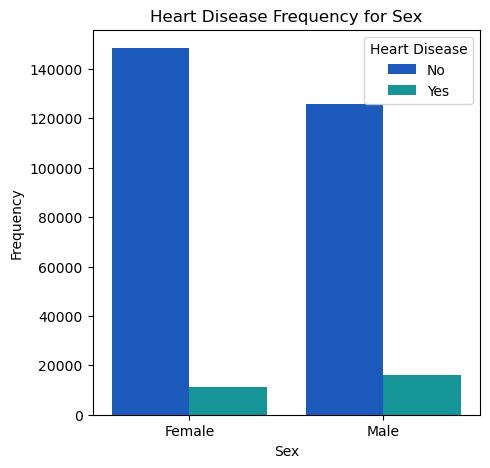

In [31]:
# Show Heart Disease Frequency for Sex
# Set the figure size
plt.figure(figsize=(5, 5))

# Create the countplot
fig = sns.countplot(x='Sex', data=df, hue='HeartDisease', palette='winter')

# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for Sex')
fig.set_xlabel('Sex')
fig.set_ylabel('Frequency')

# Add legend for Heart Disease categories
fig.legend(title='Heart Disease')

# Display the plot
plt.show()


In [32]:
# Count the occurrences of 'HeartDisease' based on the groups formed by 'Sex', 'SkinCancer', and 'HeartDisease'
df.groupby(['Sex', 'SkinCancer', 'HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

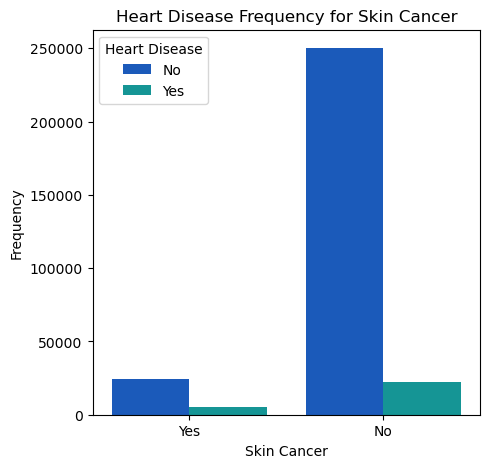

In [33]:
# Show Heart Disease Frequency for Skin Cancer
# Set the figure size
plt.figure(figsize=(5, 5))

# Create the countplot
fig = sns.countplot(x='SkinCancer', data=df, hue='HeartDisease', palette='winter')

# Set the title, x-axis label, and y-axis label
fig.set_title('Heart Disease Frequency for Skin Cancer')
fig.set_xlabel('Skin Cancer')
fig.set_ylabel('Frequency')

# Add legend for Heart Disease categories
fig.legend(title='Heart Disease')

# Display the plot
plt.show()


Let's look at outliers in numerical variables depending on AlcoholDrinking

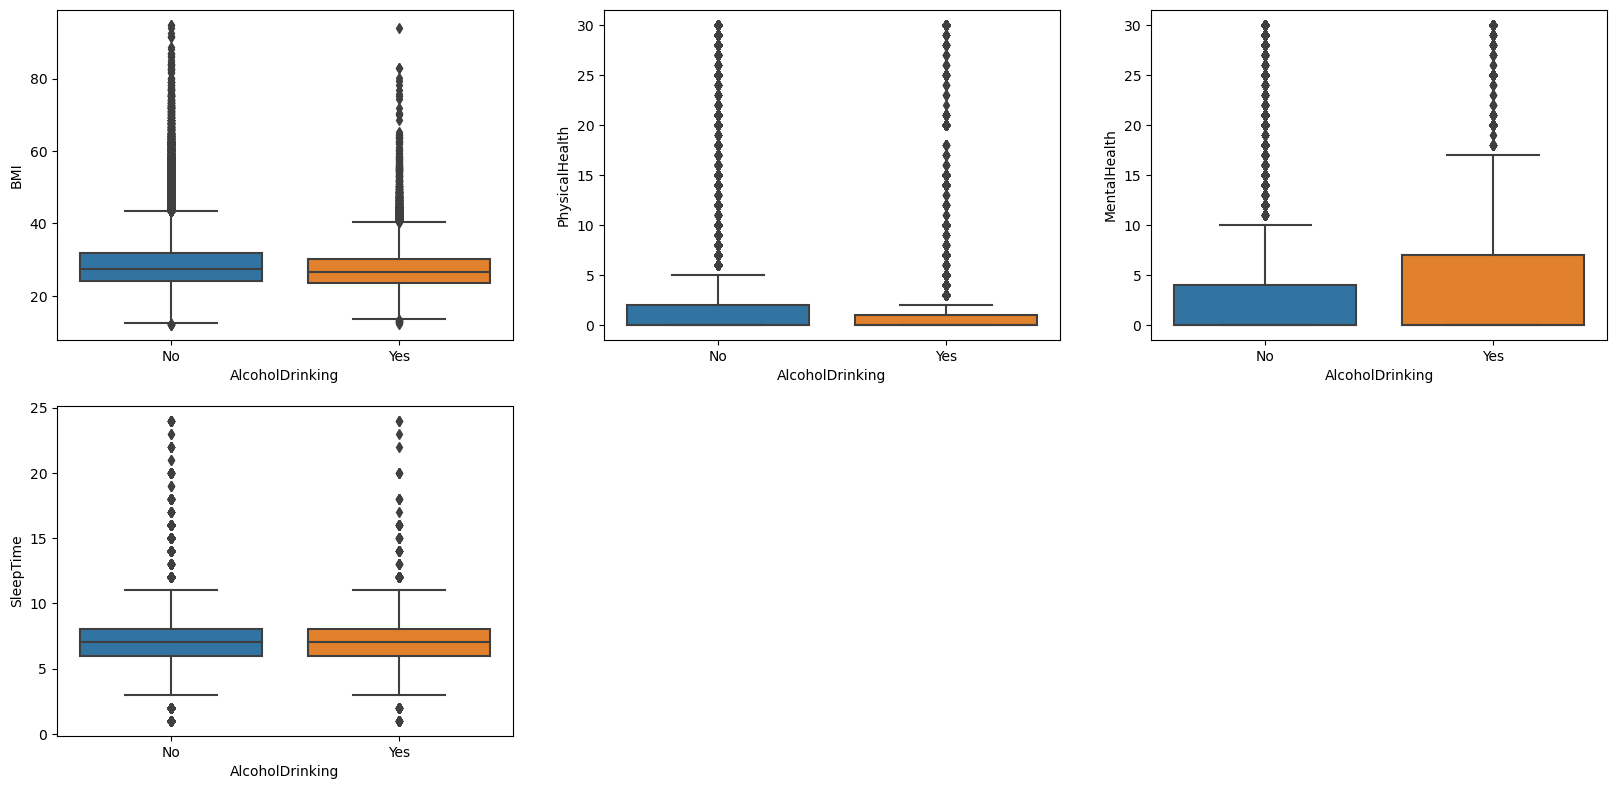

In [34]:
i = 1
plt.figure(figsize=(20, 30))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y = df[feature], x = df['AlcoholDrinking'])
    i += 1

Let's look at outliers in numerical variables depending on Diabetic

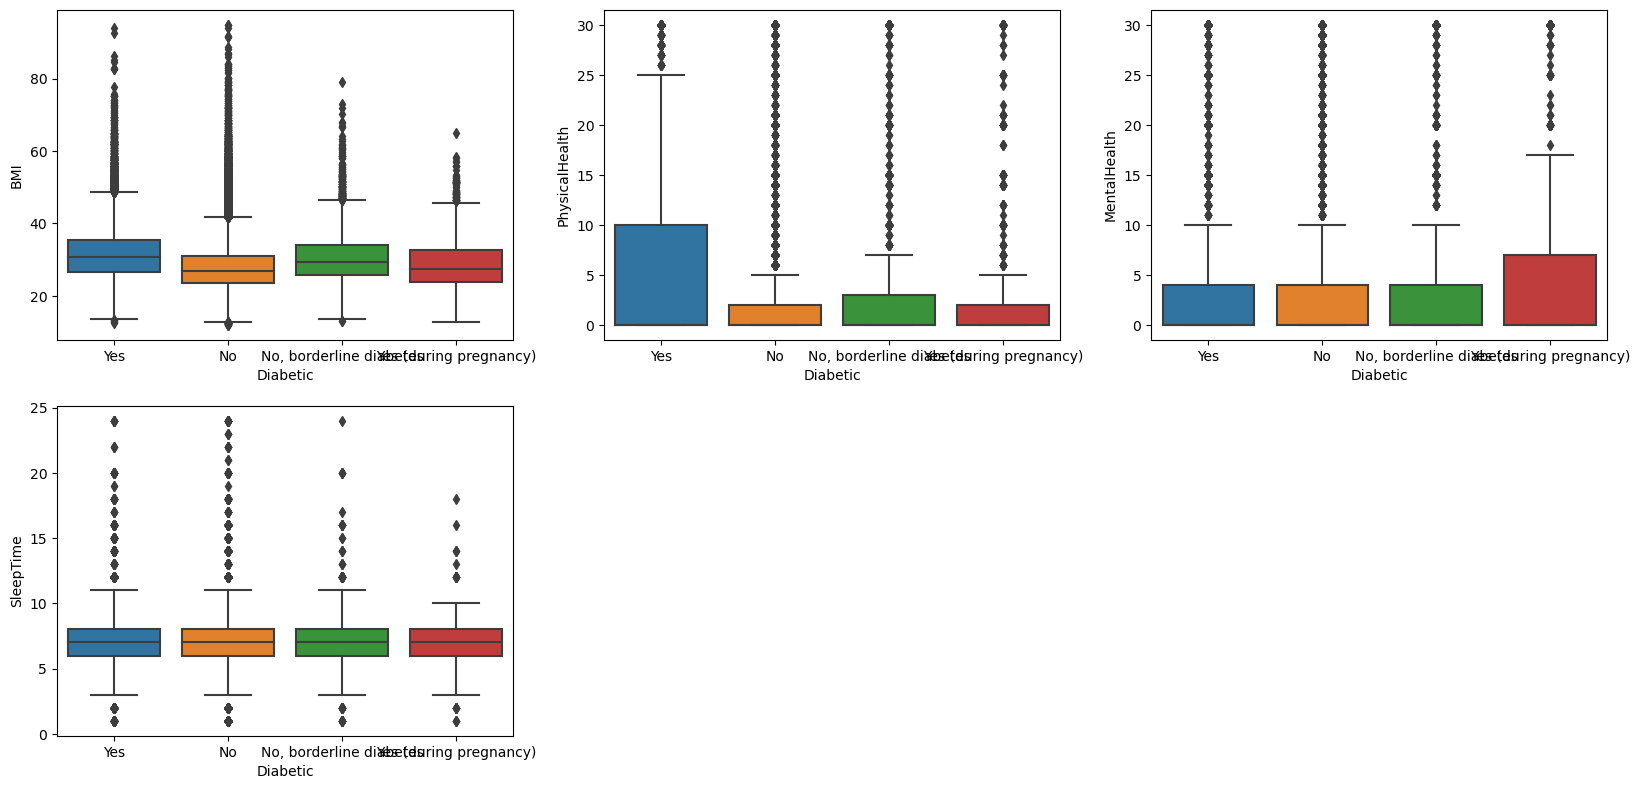

In [35]:
# Set the initial value of i to 1
i = 1
# Create a figure with a size of 20x30
plt.figure(figsize=(20, 30))
# Iterate over each feature in numeric_features
for feature in numeric_features:
    # Create a subplot at position i in a 6x3 grid
    plt.subplot(6, 3, i)
    # Create a boxplot with y-axis as the current feature and x-axis as 'Diabetic'
    sns.boxplot(y=df[feature], x=df['Diabetic'])
   # Increment the subplot counter
    i += 1

Let's look at outliers in numerical variables depending on AgeCategory

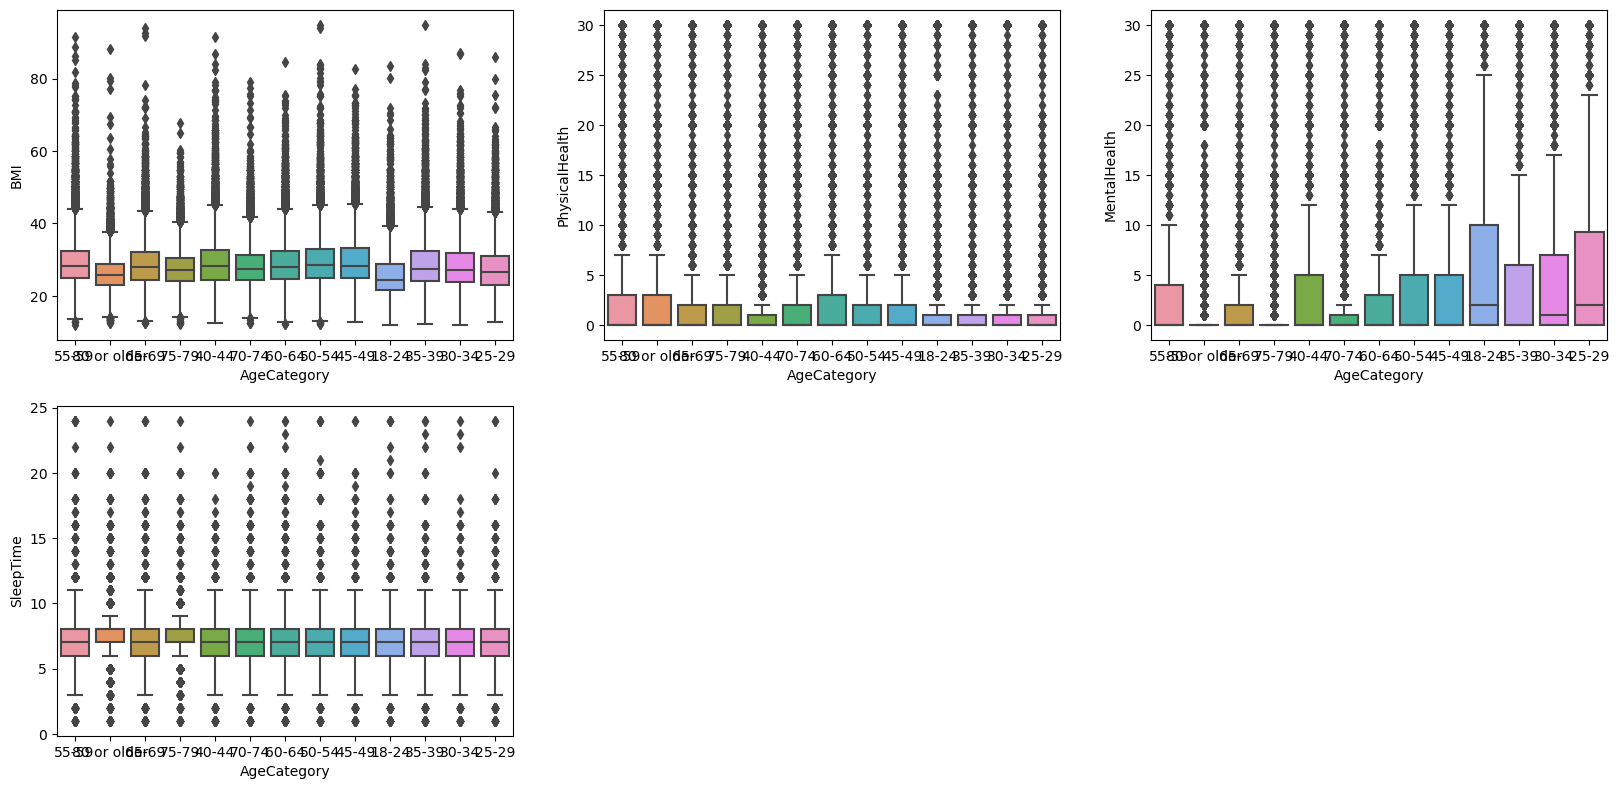

In [36]:
# Set the initial value of i to 1
i = 1
# Create a figure with a size of 20x30
plt.figure(figsize=(20, 30))
# Iterate over each feature in numeric_features
for feature in numeric_features:
    # Create a subplot at position i in a 6x3 grid
    plt.subplot(6, 3, i)
    # Create a boxplot with y-axis as the current feature and x-axis as 'AgeCategory'
    sns.boxplot(y=df[feature], x=df['AgeCategory'])
   # Increment the subplot counter
    i += 1


Let's look at outliers in numerical variables depending on HeartDisease

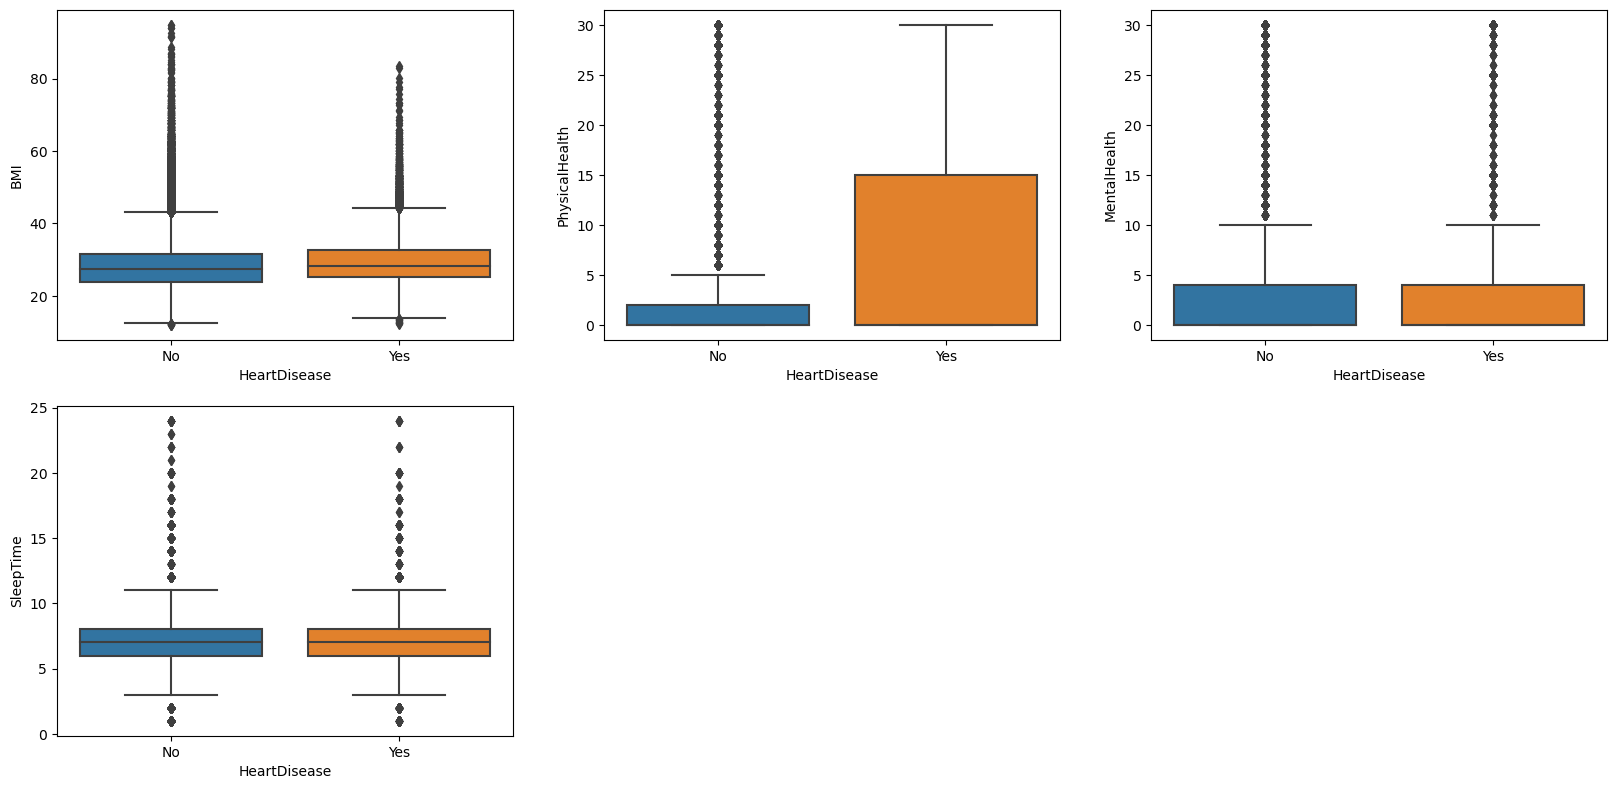

In [37]:
# Set the initial value of i to 1
i = 1
# Create a figure with a size of 20x30
plt.figure(figsize=(20, 30))
# Iterate over each feature in numeric_features
for feature in numeric_features:
    # Create a subplot at position i in a 6x3 grid
    plt.subplot(6, 3, i)
    # Create a boxplot with y-axis as the current feature and x-axis as 'HeartDisease'
    sns.boxplot(y=df[feature], x=df['HeartDisease'])
   # Increment the subplot counter
    i += 1

Let's look at outliers in numerical variables depending on KidneyDisease

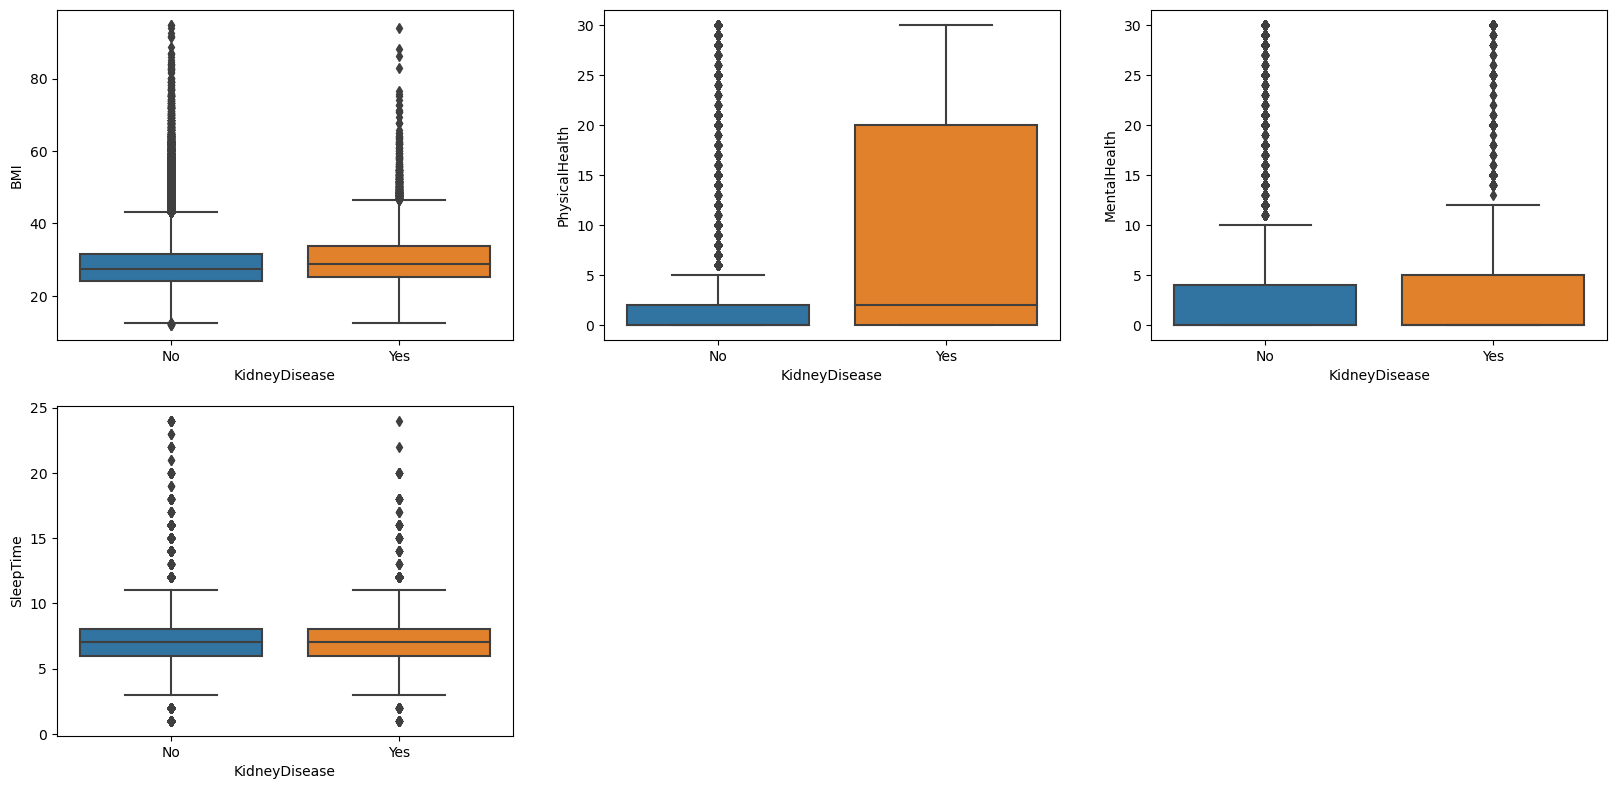

In [38]:
# Set the initial value of i to 1
i = 1
# Create a figure with a size of 20x30
plt.figure(figsize=(20, 30))
# Iterate over each feature in numeric_features
for feature in numeric_features:
    # Create a subplot at position i in a 6x3 grid
    plt.subplot(6, 3, i)
    # Create a boxplot with y-axis as the current feature and x-axis as 'KidneyDisease'
    sns.boxplot(y=df[feature], x=df['KidneyDisease'])
   # Increment the subplot counter
    i += 1    

Let's look at outliers in numerical variables depending on DiffWalking

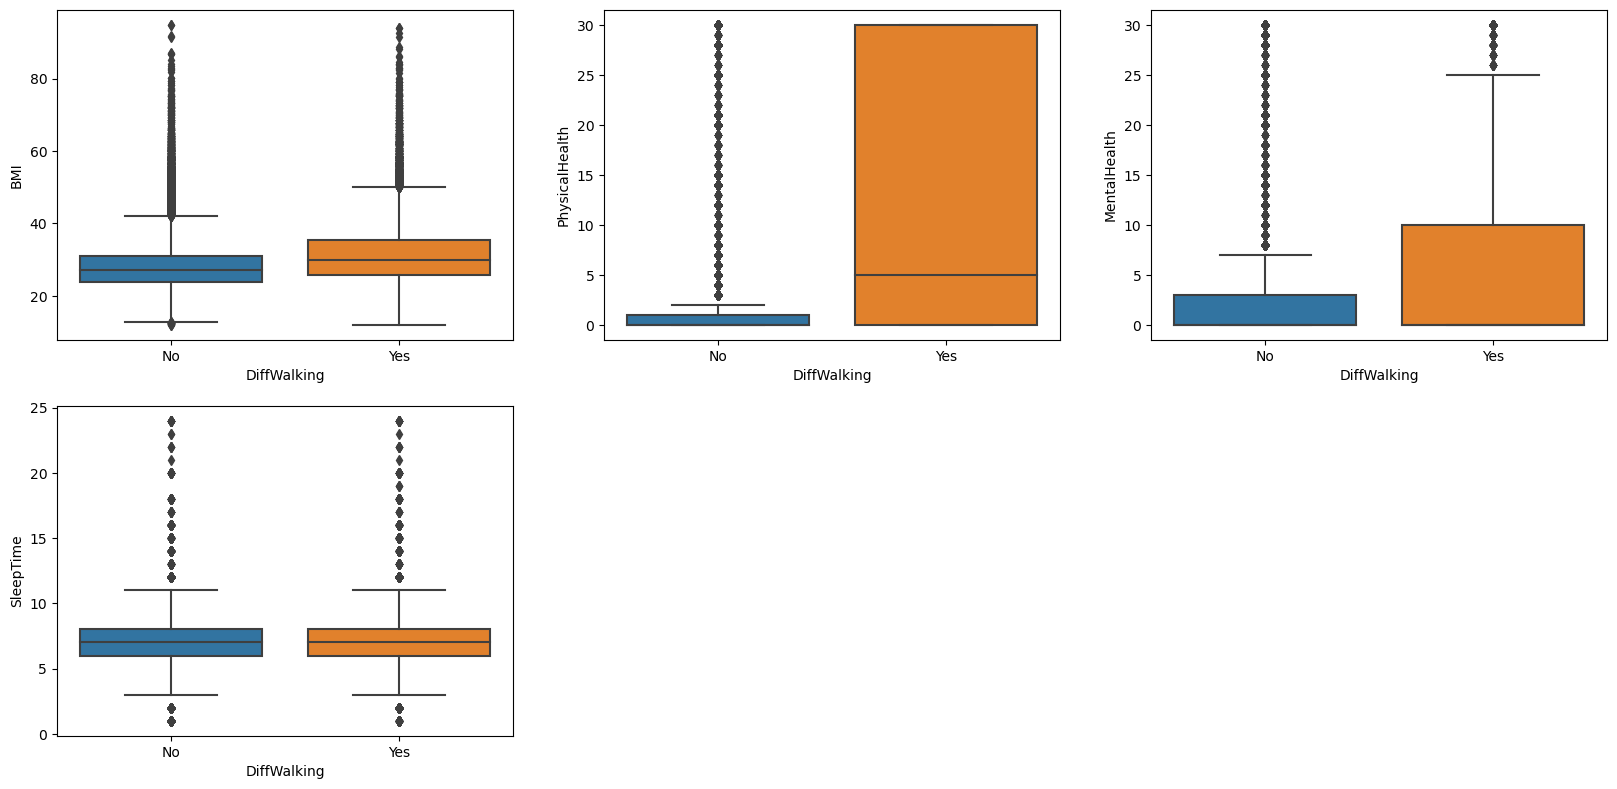

In [39]:
# Set the initial value of i to 1
i = 1
# Create a figure with a size of 20x30
plt.figure(figsize=(20, 30))
# Iterate over each feature in numeric_features
for feature in numeric_features:
    # Create a subplot at position i in a 6x3 grid
    plt.subplot(6, 3, i)
    # Create a boxplot with y-axis as the current feature and x-axis as 'DiffWalking'
    sns.boxplot(y=df[feature], x=df['DiffWalking'])
   # Increment the subplot counter
    i += 1    

# Check the Distribution and skewness of the features

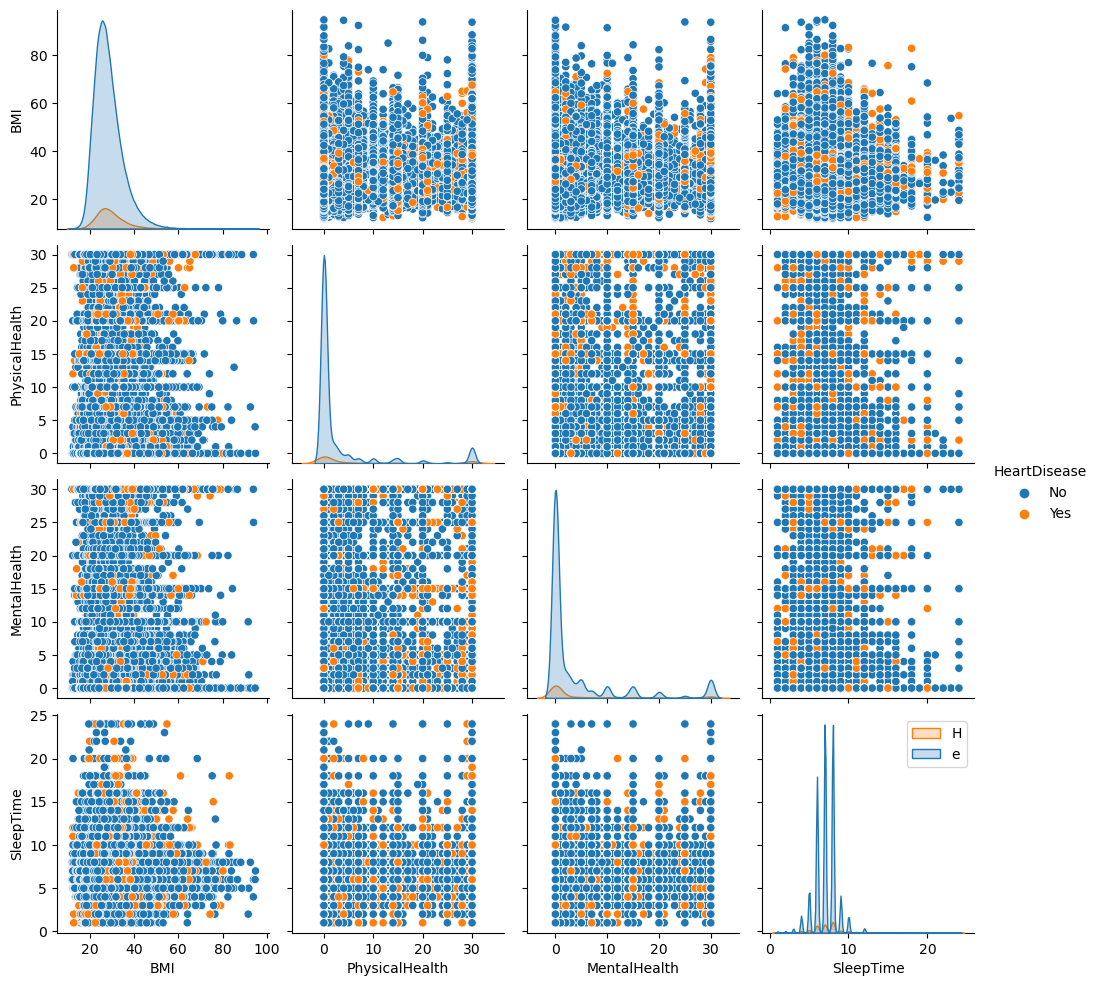

In [40]:
# Plot a pairplot with hue 'HeartDisease' using the given dataframe
sns.pairplot(data=df, hue='HeartDisease')

# Add a legend to the plot
plt.legend('HeartDisease')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

label = LabelEncoder()

# Iterate over each column in the dataframe
for column in df.columns:
    # Check if the column is numeric
    if is_numeric_dtype(df[column]):
        continue
    else:
        # Encode the non-numeric column using label encoding
        df[column] = label.fit_transform(df[column])


In [42]:
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0            7     5         2   
1             0            0    0           12     5         0   
2            30            0    1            9     5         2   
3             0            0    0           11     5         0   
4             0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          1          8       1              0           0  
3                 0          2          6       0              0           1  
4                 1          4          8       0              0           0

HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          1.000000  0.047260  0.104524        -0.036289  0.194665   
BMI                   0.047260  1.000000  0.015890        -0.043463  0.016314   
Smoking               0.104524  0.015890  1.000000         0.109183  0.058868   
AlcoholDrinking      -0.036289 -0.043463  0.109183         1.000000 -0.022707   
Stroke                0.194665  0.016314  0.058868        -0.022707  1.000000   
PhysicalHealth        0.165235  0.103813  0.110270        -0.023255  0.132966   
MentalHealth          0.020913  0.056724  0.078364         0.045421  0.041324   
DiffWalking           0.196420  0.177388  0.115789        -0.041135  0.170664   
Sex                   0.074435  0.024200  0.087514         0.006824 -0.001343   
AgeCategory           0.239259 -0.006069  0.128259        -0.060761  0.141537   
Race                  0.042720 -0.030300  0.075682         0.043128  0.001201   
Diabetic              0.163686  0.198268  0.047086        -0.063423  0.097767   
PhysicalActivity     -0.093597 -0.144441 -0.089864         0.024408 -0.074898   
GenHealth            -0.012220  0.029233  0.014055         0.001871 -0.009846   
SleepTime             0.010834 -0.048653 -0.027874        -0.003172  0.013697   
Asthma                0.035784  0.087563  0.017545        -0.007114  0.034942   
KidneyDisease         0.142672  0.047796  0.031890        -0.031166  0.089109   
SkinCancer            0.090644 -0.038060  0.030438        -0.008739  0.046039   

                  PhysicalHealth  MentalHealth  DiffWalking       Sex  \
HeartDisease            0.165235      0.020913     0.196420  0.074435   
BMI                     0.103813      0.056724     0.177388  0.024200   
Smoking                 0.110270      0.078364     0.115789  0.087514   
AlcoholDrinking        -0.023255      0.045421    -0.041135  0.006824   
Stroke                  0.132966      0.041324     0.170664 -0.001343   
PhysicalHealth          1.000000      0.279657     0.422935 -0.038427   
MentalHealth            0.279657      1.000000     0.142964 -0.098916   
DiffWalking             0.422935      0.142964     1.000000 -0.067335   
Sex                    -0.038427     -0.098916    -0.067335  1.000000   
AgeCategory             0.114623     -0.158608     0.250407 -0.060620   
Race                    0.010179     -0.002489    -0.005648  0.015599   
Diabetic                0.143418      0.022475     0.198877 -0.010581   
PhysicalActivity       -0.224121     -0.084274    -0.271748  0.045309   
GenHealth              -0.037669     -0.005259    -0.045966 -0.011778   
SleepTime              -0.058406     -0.117078    -0.019155 -0.014901   
Asthma                  0.110083      0.105266     0.095826 -0.067960   
KidneyDisease           0.138219      0.032105     0.149471 -0.007579   
SkinCancer              0.036753     -0.040214     0.060596  0.015846   

                  AgeCategory      Race  Diabetic  PhysicalActivity  \
HeartDisease         0.239259  0.042720  0.163686         -0.093597   
BMI                 -0.006069 -0.030300  0.198268         -0.144441   
Smoking              0.128259  0.075682  0.047086         -0.089864   
AlcoholDrinking     -0.060761  0.043128 -0.063423          0.024408   
Stroke               0.141537  0.001201  0.097767         -0.074898   
PhysicalHealth       0.114623  0.010179  0.143418         -0.224121   
MentalHealth        -0.158608 -0.002489  0.022475         -0.084274   
DiffWalking          0.250407 -0.005648  0.198877         -0.271748   
Sex                 -0.060620  0.015599 -0.010581          0.045309   
AgeCategory          1.000000  0.165041  0.199065         -0.125294   
Race                 0.165041  1.000000 -0.042948          0.045198   
Diabetic             0.199065 -0.042948  1.000000         -0.125068   
PhysicalActivity    -0.125294  0.045198 -0.125068          1.000000   
GenHealth            0.036864  0.051896 -0.012309          0.026726   
SleepTime            0.10

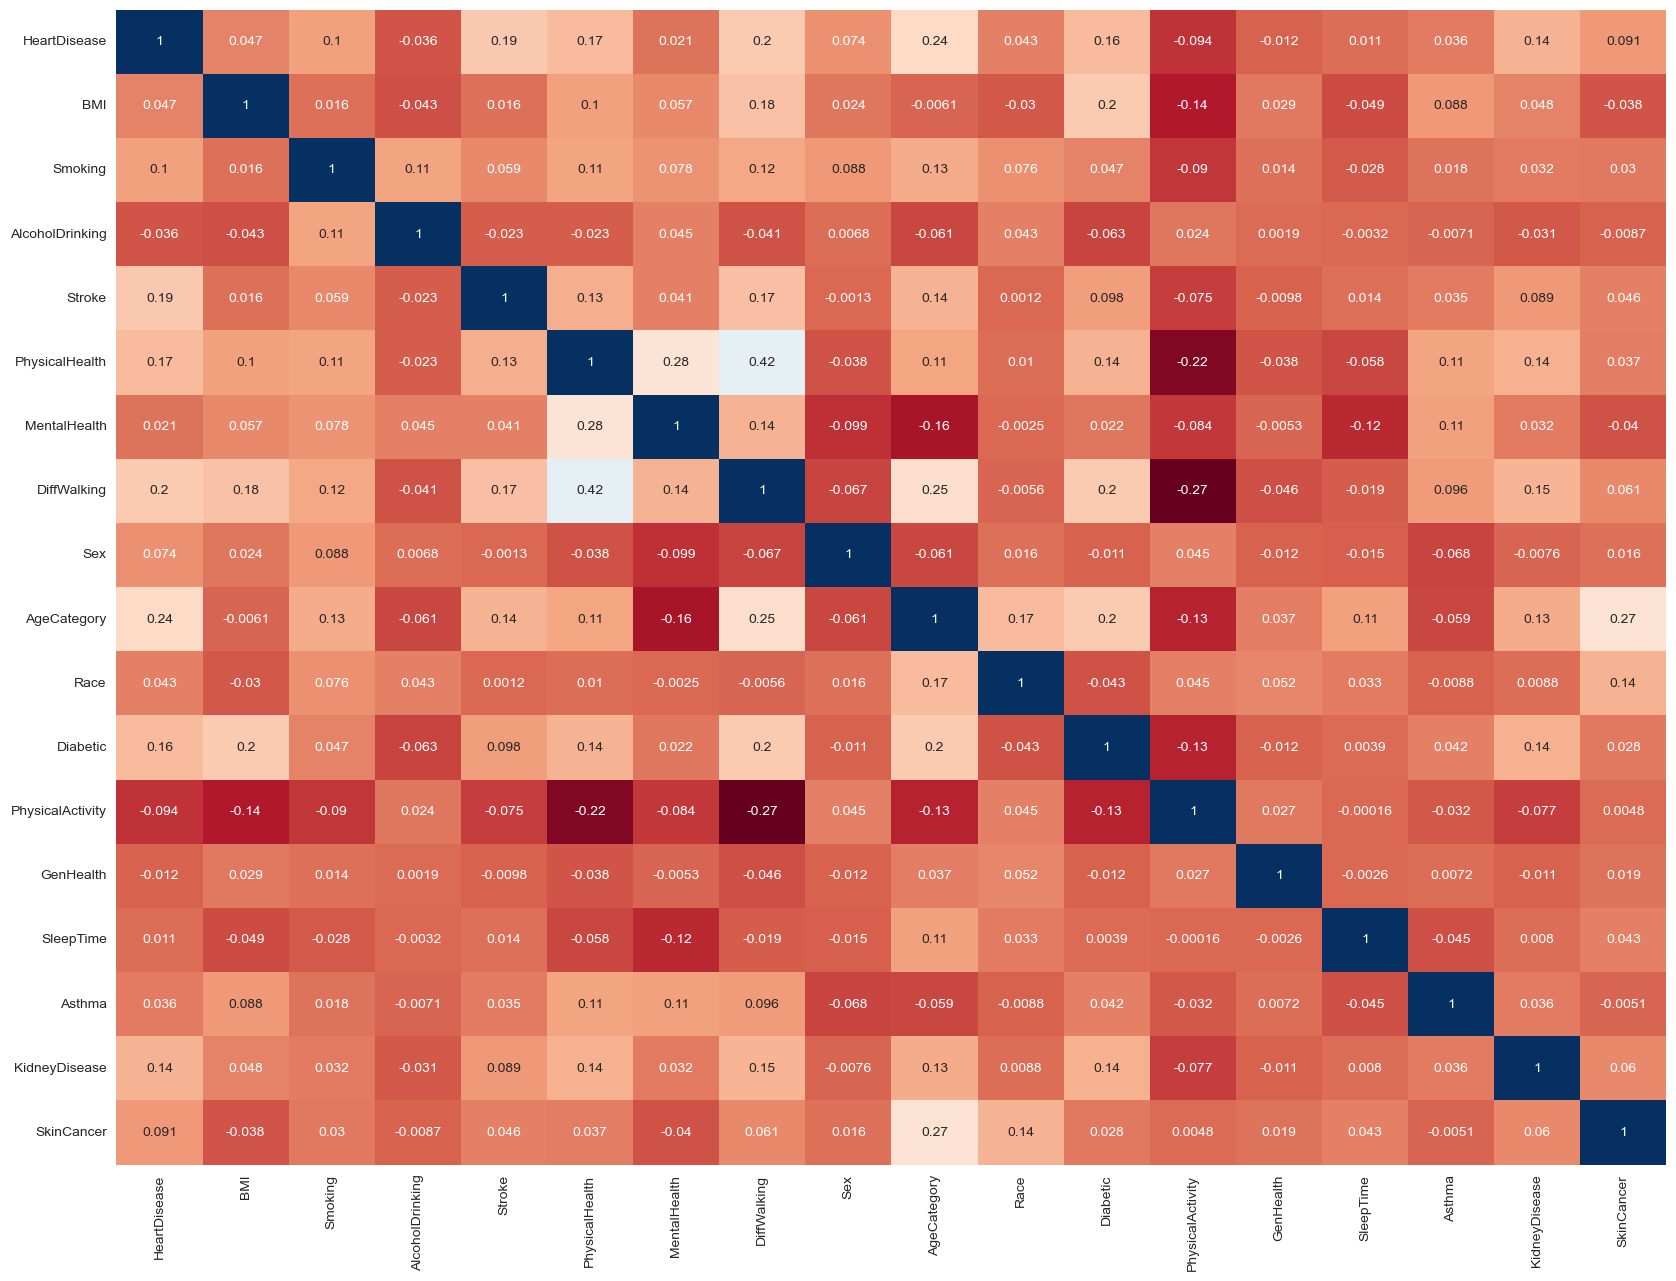

In [45]:
def plot_correlation_heatmap(df):
    """
    Plots a correlation heatmap for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        None
    """
    plt.figure(figsize=(20, 15))
    sns.heatmap(df.corr(), annot=True, cbar=False, cmap='RdBu')

# Call the function to plot the correlation heatmap
plot_correlation_heatmap(df)

# Display the correlation matrix
df.corr()

In [46]:
def plot_feature_correlation(correlation):
    """
    Plot the distribution of correlation of features.
    
    Args:
        correlation (pandas.DataFrame): A DataFrame containing correlation values.

    Returns:
        None
    """
    sns.set_style('white')
    sns.set_palette('YlOrBr')
    
    plt.figure(figsize=(25, 10))
    plt.title('Distribution of correlation of features')
    
    abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
    
    plt.show()


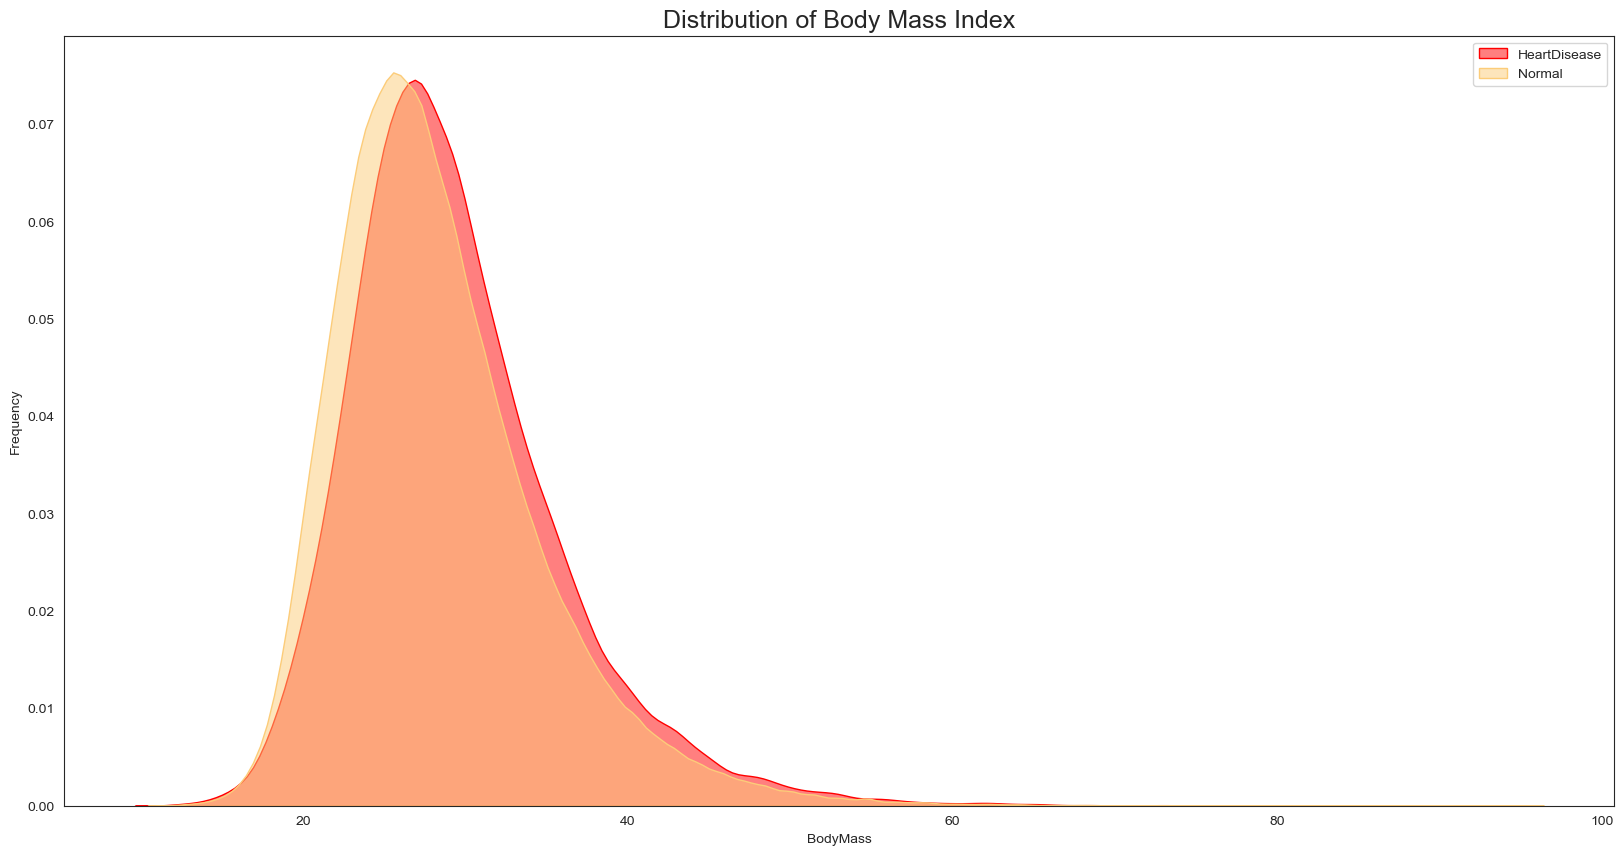

In [47]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot KDE for HeartDisease cases
sns.kdeplot(
    df[df["HeartDisease"] == 1]["BMI"],
    alpha=0.5,
    shade=True,
    color="red",
    label="HeartDisease",
    ax=ax
)

# Plot KDE for Normal cases
sns.kdeplot(
    df[df["HeartDisease"] == 0]["BMI"],
    alpha=0.5,
    shade=True,
    color="#fccc79",
    label="Normal",
    ax=ax
)

# Set title, x-label, and y-label
plt.title('Distribution of Body Mass Index', fontsize=18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")

# Add legend
ax.legend()

# Show the plot
plt.show()


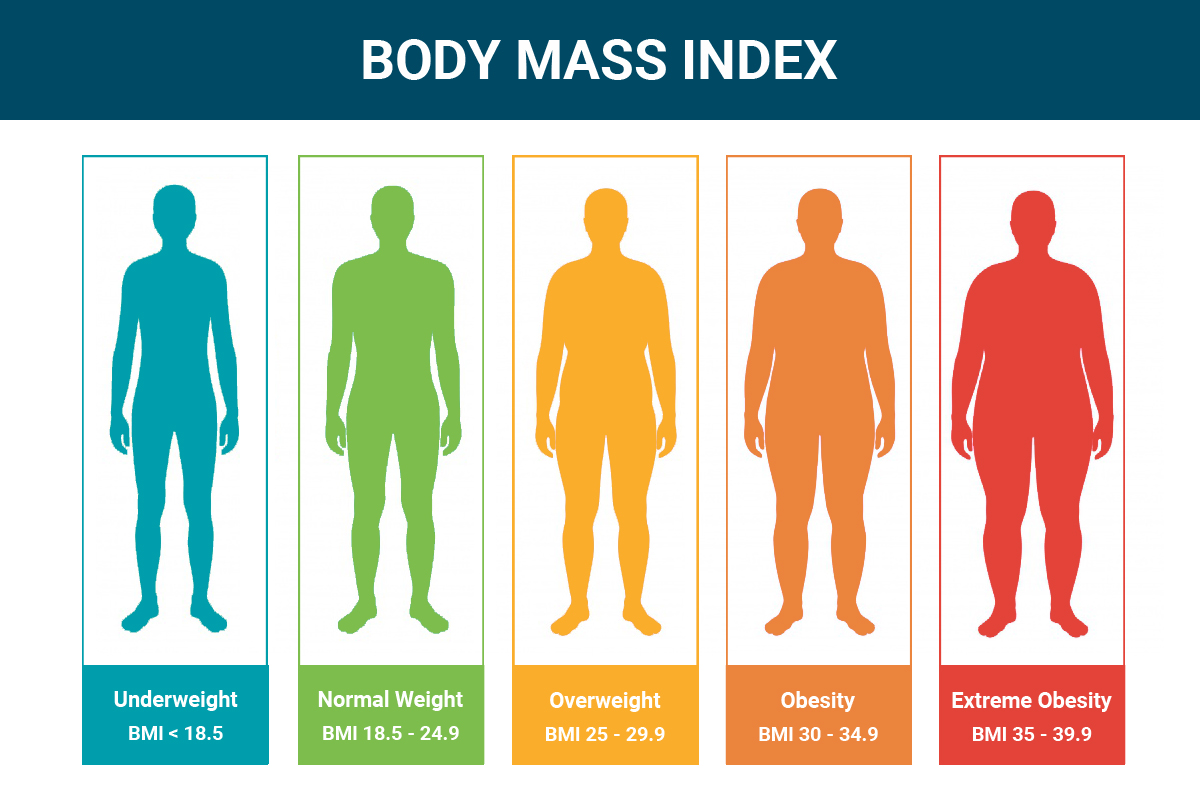